In [58]:
!pip install --quiet --requirement requirements.txt

In [102]:
import glob
import re

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import urllib.request

import csv
import dateutil

from functions import read_levels_file, fft_analysis

In [60]:
sns.set_theme()
%matplotlib inline

Download data from https://check-for-flooding.service.gov.uk/river-and-sea-levels?lng=-0.58408&lat=52.49929

https://riverlevels.uk/hebden-water-hebden-royd-nutclough

http://environment.data.gov.uk/flood-monitoring/id/stations/L1231/readings.csv?parameter=level&since=2010-01-01&_limit=10000&_sorted

In [ ]:
with urllib.request.urlopen('http://environment.data.gov.uk/flood-monitoring/id/stations/L1231/readings.csv?parameter=level&since=2010-01-01&_limit=10000&_sorted') as response:
    raw_data = [r.decode('utf-8') for r in response.readlines()]
    def reshape(row):
        x = row.split(',')
        return ','.join([x[0], x[2]])
    with open('L1231.csv', 'w') as csv_file:
        csv_file.write(reshape(raw_data[0]))
        csv_file.write(''.join([reshape(x) for x in raw_data[:1:-1]]))

In [61]:
def read_levels_foir(filename):
    with open(filename) as f:
        data = [l.strip() for l in f.readlines()][21:]
        data = list(csv.reader(data, delimiter=",", strict=True))
    dates = [dateutil.parser.parse(r[0], dayfirst=True) for r in data]
    levels = np.array([float(r[1]) for r in data])
    return (dates, levels)

Set some FFT parameters

In [123]:
def plot_levels(title, filename):
    plt.figure(figsize = (12, 6))
    plt.title(title)
    plt.plot(dates, levels, 'r')     
    plt.xticks(rotation=30, ha='right')
    plt.xlabel('Date')
    plt.ylabel('Level')
    plt.savefig('output/{}.png'.format(filename))
    plt.show()

In [124]:
def plot_fft(title, filename):
    plt.figure(figsize = (12, 6))
    plt.title(title)
    plt.imshow(np.transpose(result), origin='lower', cmap='jet', interpolation='nearest', aspect='auto')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time')
    plt.xticks([])
    plt.ticklabel_format(scilimits=[1,-1])
    num_ticks = 5
    plt.yticks(np.arange(num_ticks) * fft_size/(num_ticks-1), [f"{x:.1e}" for x in np.arange(num_ticks) * fs/2/(num_ticks-1)])
    plt.savefig('output/{}.png'.format(filename))
    plt.show()

In [128]:
data_files = glob.glob('data/*.csv')

In [129]:
ts = 15 * 60 # Sampling is 15 minutes
fs = 1.0 / ts
fft_size=150

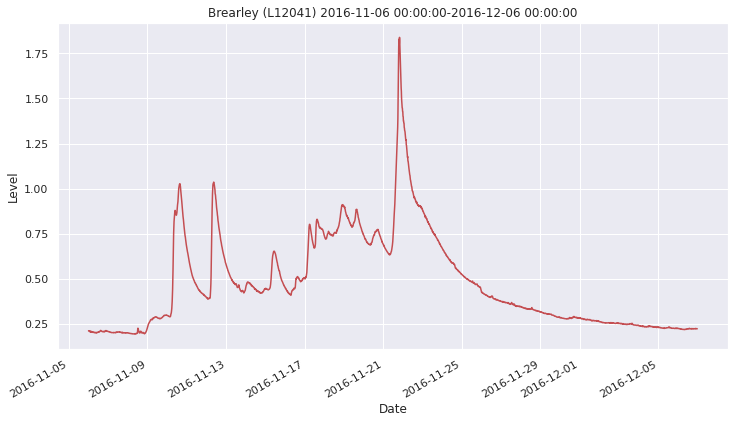

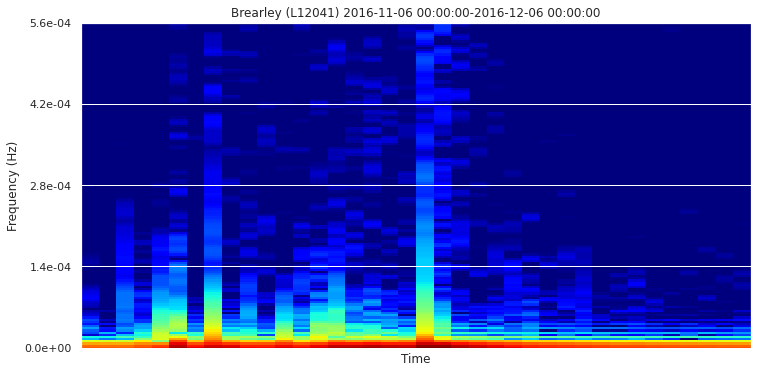

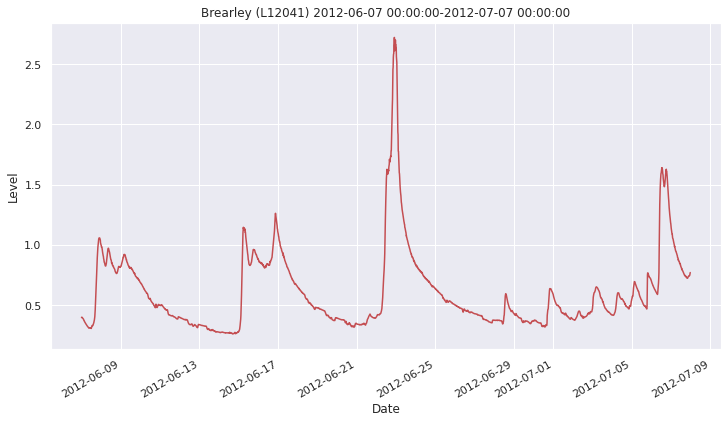

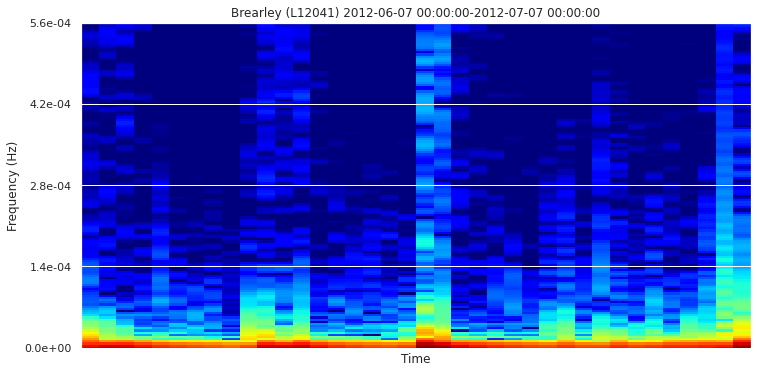

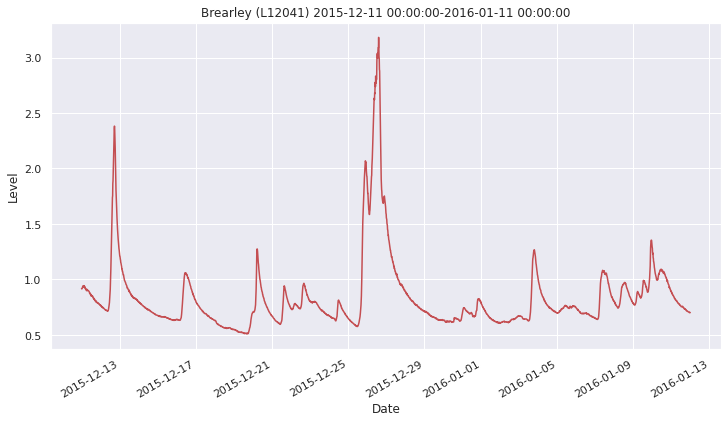

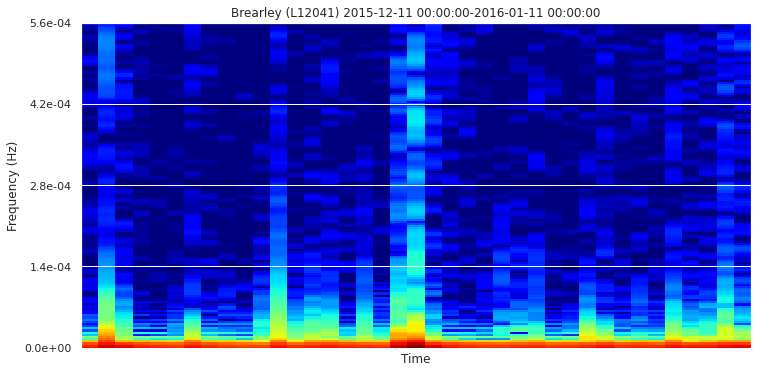

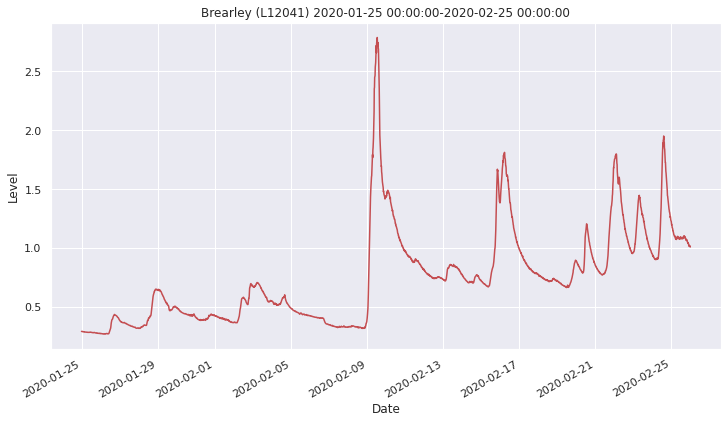

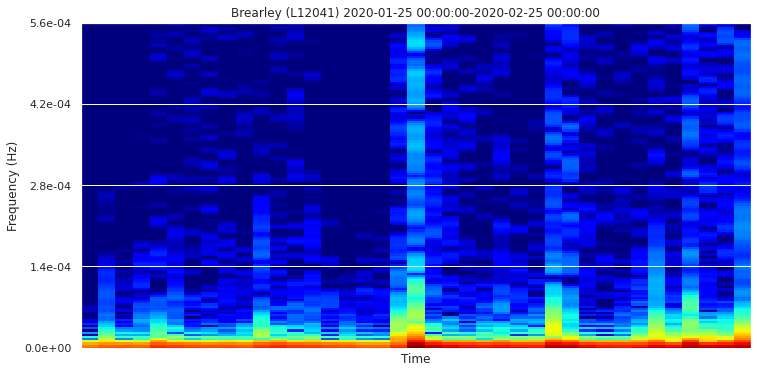

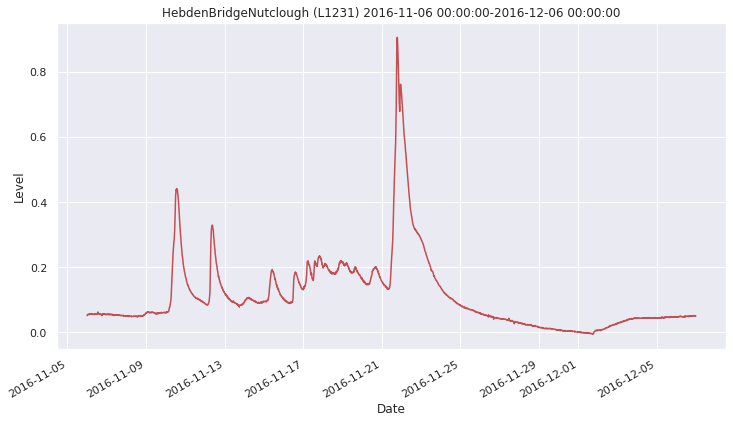

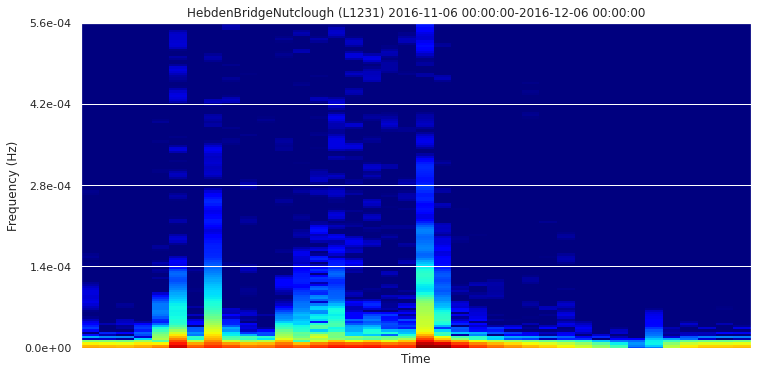

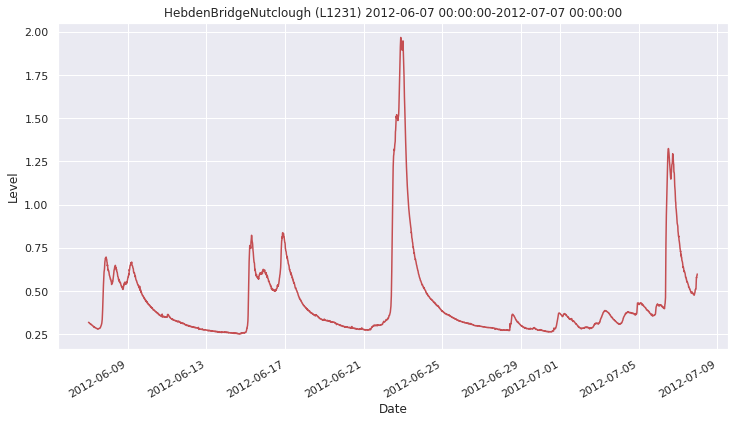

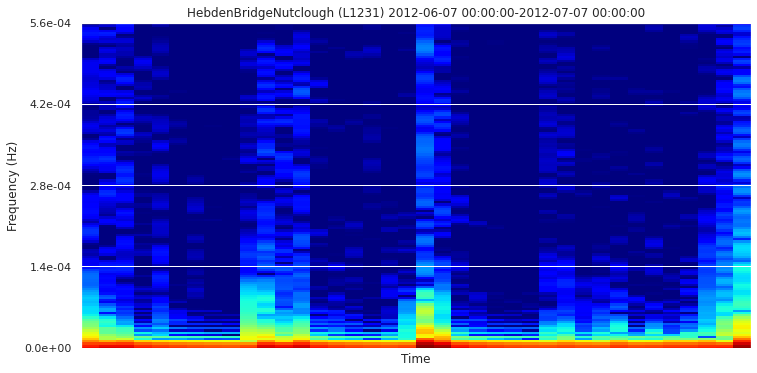

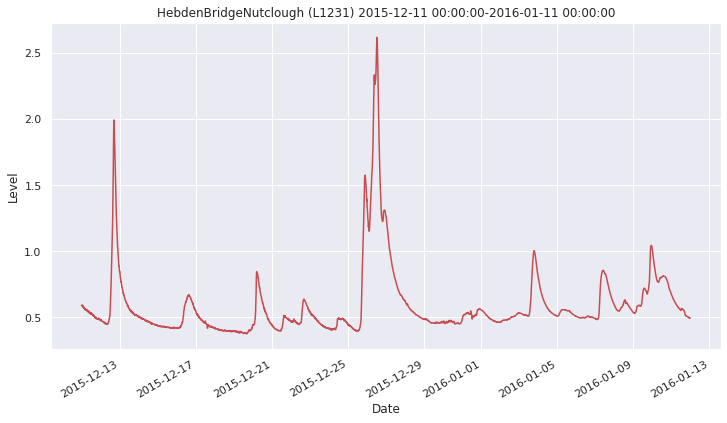

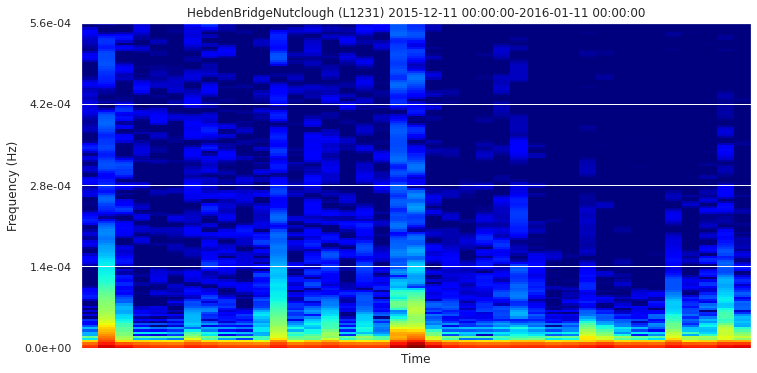

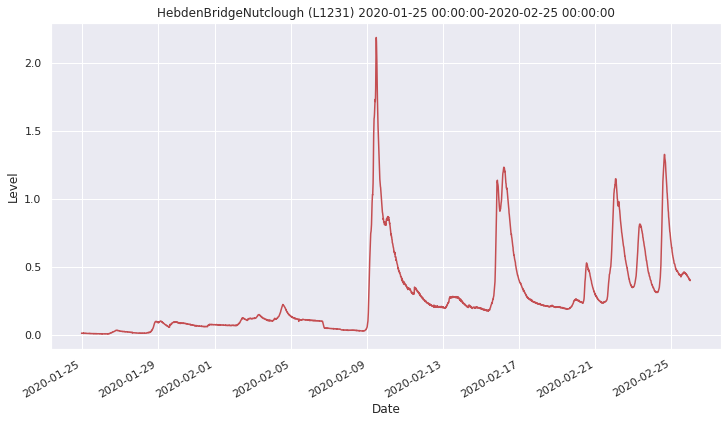

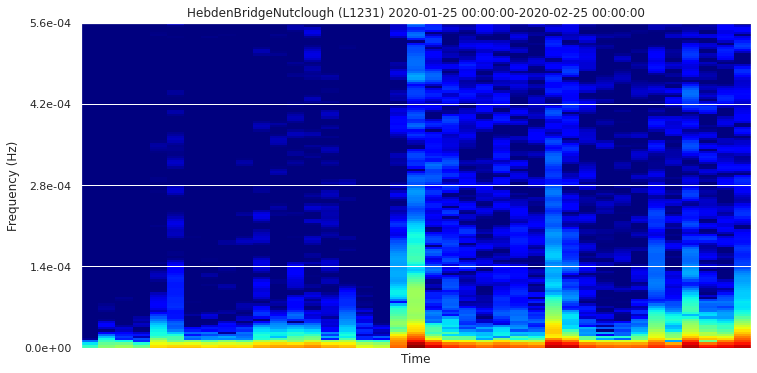

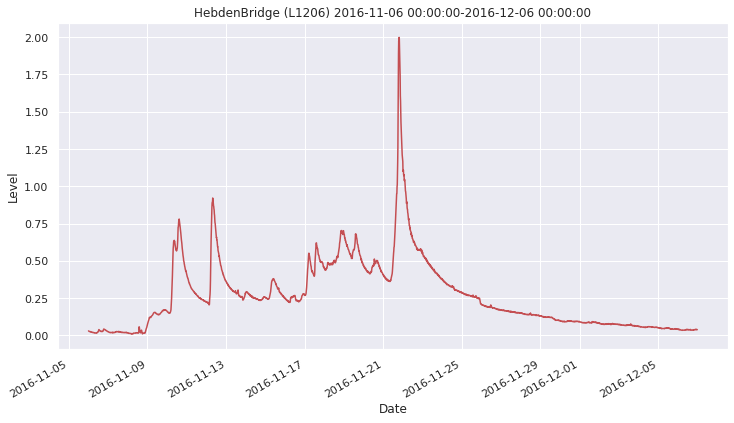

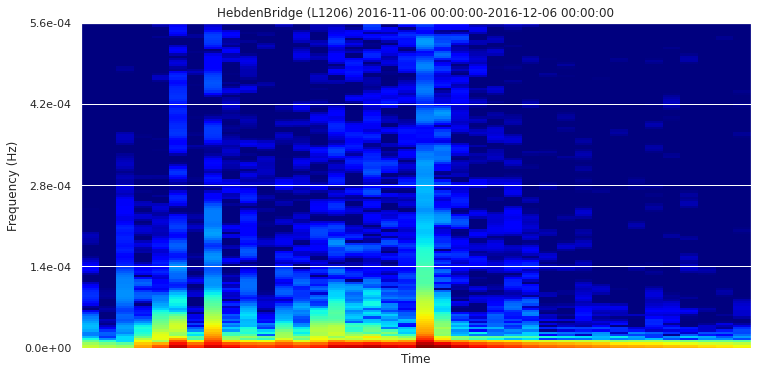

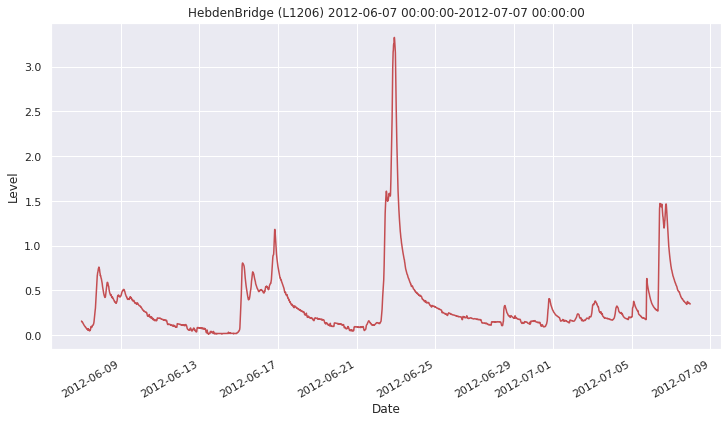

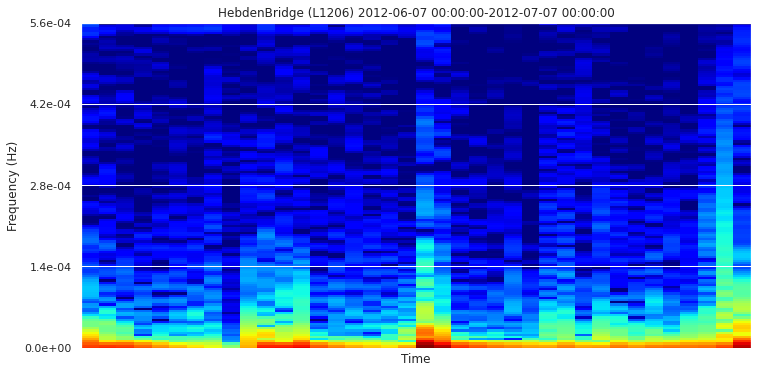

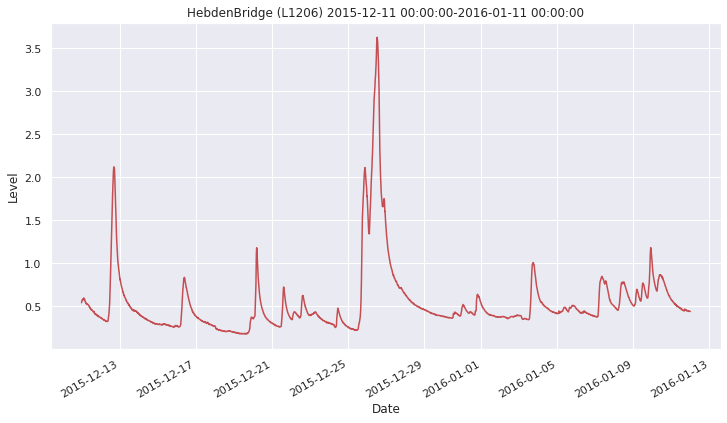

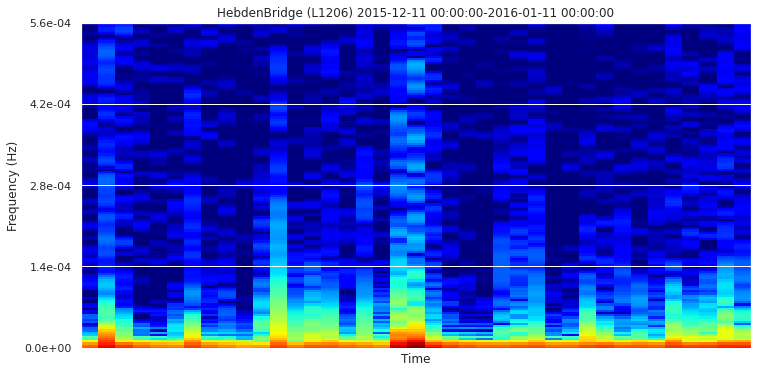

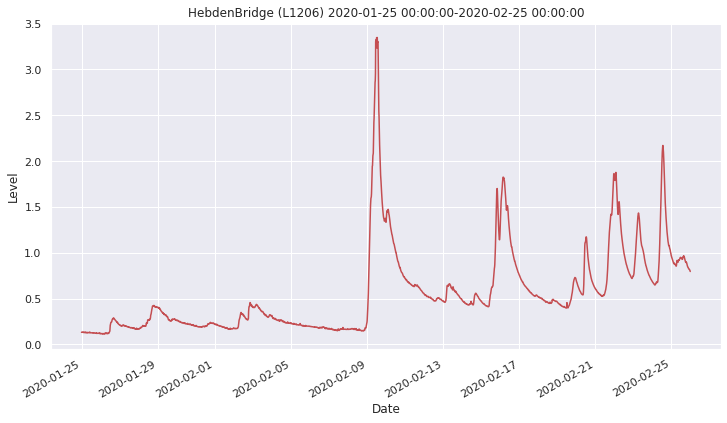

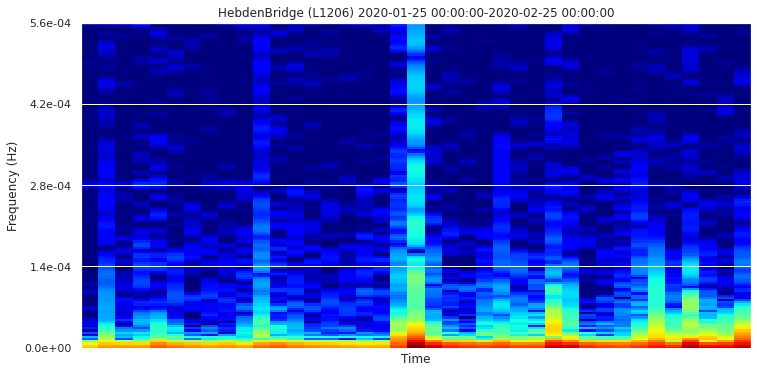

In [130]:
for i,sample in enumerate(data_files):
    (dates, levels) = read_levels_foir(sample)
    [_, station, id, _, start, end, _] = re.split('[/_.]', sample)
    start = dateutil.parser.parse(start, dayfirst=True)
    end = dateutil.parser.parse(end, dayfirst=True)
    title = '{station} ({id}) {start}-{end}'.format(station=station, id=id, start=start, end=end)
    suffix = '{}-{}-{}'.format(id, station, start.strftime('%Y%m%d')) 
    result = fft_analysis(levels, fs, fft_size)
    plot_levels(title, suffix + '-levels')
    plot_fft(title, suffix + '-fft')

In [101]:
[_, station, id, _, start, end, _] = re.split('[/_.]', sample)
# start = dateutil.parser.parse(start, dayfirst=True)
# end = dateutil.parser.parse(end, dayfirst=True)

In [94]:
re.split('[/_.]', sample)

['data', 'HebdenBridge', 'L1206', '15minStage', '250120', '250220', 'csv']